In [10]:
import numpy as np
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
import community
import networkx as nx
loc = scipy.io.loadmat('data\XYZcoord1.mat')
loc = np.array(loc['XYZ1'])

In [11]:
edge = np.array(pd.read_csv('data\Edges.csv').iloc[:, 0:3].values)

In [14]:
distance = []
for i in range(len(loc)):
    for j in range(i, len(loc)):
        temp = 0
        for k in range(3):
            temp += (loc[i][k] - loc[j][k])**2
        if i != j:
            distance.append([i+1, j+1, temp])

array([[1.00000000e+00, 2.00000000e+00, 6.65896402e+02],
       [1.00000000e+00, 3.00000000e+00, 4.08436617e+02],
       [1.00000000e+00, 4.00000000e+00, 1.23927653e+02],
       ...,
       [1.99800000e+03, 1.99900000e+03, 4.32160535e+02],
       [1.99800000e+03, 2.00000000e+03, 4.41265146e+02],
       [1.99900000e+03, 2.00000000e+03, 5.66488956e+00]])

In [16]:
G = nx.Graph()
for i in range(0, len(edge)):    
    e = ( str(int(edge[i,0])), str(int(edge[i,1])), edge[i,2] )
    G.add_weighted_edges_from([(e)])

H = nx.Graph()
for j in range(0, len(distance)):    
    f = ( str(int(distance[j][0])), str(int(distance[j][1])), distance[j][2] )
    H.add_weighted_edges_from([(f)])

In [17]:
partition = community.best_partition(G)
size = float(len(set(partition.values())))
print("geo_community:", size)
mod = community.modularity(partition,G)
print("geo_modularity:", mod)

partition2 = community.best_partition(H)
size = float(len(set(partition2.values())))
print("euc_community:", size)
mod = community.modularity(partition2,H)
print("euc_modularity:", mod)

geo_community: 44.0
geo_modularity: 0.9369909162440625
euc_community: 100.0
euc_modularity: -6.147457364596188e-08


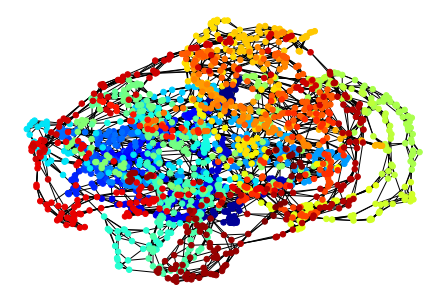

In [19]:
for com in set(partition.values()) :
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)

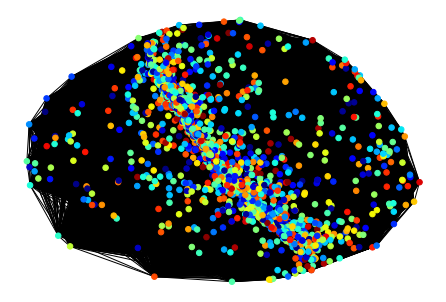

In [20]:
for com2 in set(partition2.values()) :
    members2 = list_nodes2 = [nodes2 for nodes2 in partition2.keys() if partition2[nodes2] == com2]
values2 = [partition2.get(node2) for node2 in H.nodes()]
nx.draw_spring(H, cmap = plt.get_cmap('jet'), node_color = values2, node_size = 30, with_labels = False)

In [21]:
label = np.zeros((len(loc),1))
for j in set(partition.values()) :
    for i in range(len(loc)) :
        if partition[str(i+1)] == j :            
            label[i] =  j
labelRE = np.reshape(label, len(loc))      

#assign data point color based on Euclidean community in realspace
label2 = np.zeros((len(loc),1))
for j in set(partition2.values()) :
    for i in range(len(loc)) :
        if partition2[str(i+1)] == j :            
            label2[i] =  j
labelRE2 = np.reshape(label2, len(loc))

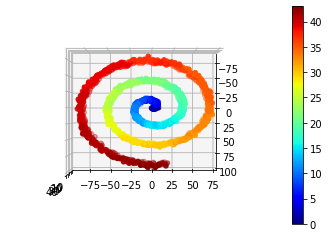

In [33]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.axes(projection='3d')
x = loc[:,0]
y = loc[:,1]
z = loc[:,2]
c = labelRE
ax1=ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(90, 0)
fig.colorbar(ax1)

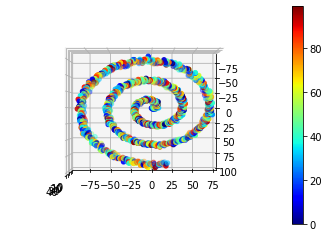

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = loc[:,0]
y = loc[:,1]
z = loc[:,2]
c = labelRE2
ax1=ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(90, 0)
fig.colorbar(ax1)

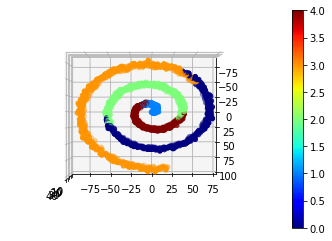

In [37]:
from sklearn.cluster import KMeans
class_ = KMeans(n_clusters=5).fit_predict(labelRE.reshape(-1,1))
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = loc[:,0]
y = loc[:,1]
z = loc[:,2]
ax1=ax.scatter(x, y, z, c=class_, cmap='jet')
ax.view_init(90, 0)
fig.colorbar(ax1)

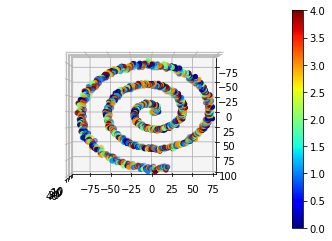

In [35]:
class_ = KMeans(n_clusters=5).fit_predict(labelRE2.reshape(-1,1))
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x = loc[:,0]
y = loc[:,1]
z = loc[:,2]
ax1=ax.scatter(x, y, z, c=class_, cmap='jet')
ax.view_init(90, 0)
fig.colorbar(ax1)